In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mt
import matplotlib.pyplot as plt
from pandas import DataFrame, read_excel, merge

In [51]:
hourly_data = pd.read_csv('D:\\Practical Data\\Week 4\\Uber Data\\bangalore-wards-2019-4-All-HourlyAggregate.csv')
blr_wards = pd.read_excel('D:\\Practical Data\\Week 4\\Uber Data\\csv_converted\\bangalore_wards_Modified_1.xlsx')
Weekly_data = pd.read_csv('D:\\Practical Data\\Week 4\\Uber Data\\bangalore-wards-2019-4-All-WeeklyAggregate.csv')

In [52]:
hourly_data1 = pd.DataFrame(hourly_data)
blr_wards1 = pd.DataFrame(blr_wards)

In [53]:
hourly_data.shape

(854482, 7)

In [54]:
hourly_data1.columns

Index(['sourceid', 'dstid', 'hod', 'mean_travel_time',
       'standard_deviation_travel_time', 'geometric_mean_travel_time',
       'geometric_standard_deviation_travel_time'],
      dtype='object')

In [55]:
blr_wards1.dtypes

MOVEMENT_ID      int64
DISPLAY_NAME    object
dtype: object

In [56]:
blr_wards2 = pd.DataFrame(blr_wards1)

In [57]:
#blr_wards2 = blr_wards2.drop(['type','type.1','WARD_NO','WARD_NAME','feature_type','coordinates__001','coordinates__002'], axis = 1)
#blr_wards3 = blr_wards3.drop(['type','type.1','WARD_NO','WARD_NAME','feature_type','coordinates__001','coordinates__002'], axis = 1)

In [58]:
blr_wards2.columns

Index(['MOVEMENT_ID', 'DISPLAY_NAME'], dtype='object')

In [59]:
blr_wards2.columns = ["sourceid","source_name"]
blr_wards2.columns

Index(['sourceid', 'source_name'], dtype='object')

In [60]:
blr_wards2.dtypes

sourceid        int64
source_name    object
dtype: object

In [61]:
blr_wards2.shape

(198, 2)

In [62]:
Weekly_data.dtypes

sourceid                                      int64
dstid                                         int64
dow                                           int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
dtype: object

In [63]:
Weekly_data['mean_travel_time_mins']=Weekly_data['mean_travel_time']/60
Weekly_data['standard_deviation_travel_time_mins']=Weekly_data['standard_deviation_travel_time']/60
Weekly_data['geometric_mean_travel_time_mins']=Weekly_data['geometric_mean_travel_time']/60

In [64]:
hourly_data1['mean_travel_time_mins']=hourly_data1['mean_travel_time']/60
hourly_data1['standard_deviation_travel_time_mins']=hourly_data1['standard_deviation_travel_time']/60
hourly_data1['geometric_mean_travel_time_mins']=hourly_data1['geometric_mean_travel_time']/60

In [65]:
hourly_data1.shape

(854482, 10)

In [66]:
Weekly_data.describe()

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,mean_travel_time_mins,standard_deviation_travel_time_mins,geometric_mean_travel_time_mins
count,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000
mean,99.726360,99.768663,4.003684,2348.104783,794.949807,2215.896753,1.456126,39.135080,13.249163,36.931613
std,57.146814,57.339087,2.000577,1080.959491,332.492531,1037.938717,0.257603,18.015992,5.541542,17.298979
min,1.000000,1.000000,1.000000,66.760000,53.560000,23.180000,1.060000,1.112667,0.892667,0.386333
25%,50.000000,50.000000,2.000000,1552.342500,552.510000,1456.962500,1.340000,25.872375,9.208500,24.282708
50%,100.000000,100.000000,4.000000,2309.110000,748.205000,2186.275000,1.400000,38.485167,12.470083,36.437917
75%,149.000000,150.000000,6.000000,3091.250000,990.905000,2932.885000,1.480000,51.520833,16.515083,48.881417
max,198.000000,198.000000,7.000000,7050.330000,3958.520000,6806.120000,8.860000,117.505500,65.975333,113.435333


In [67]:
#hourly_data1 = pd.merge(hourly_data1,blr_wards1, on='sourceid', how='left')
#hourly_data1.set_index('sourceid').join(blr_wards1.set_index('sourceid'))
#hourly_data1 = hourly_data1.merge(hourly_data1, blr_wards1, on='sourceid', how='left')
#hourly_data1 = hourly_data1.merge(blr_wards1, on='sourceid', how='left')
#hourly_data1 = hourly_data1.merge(blr_wards2, on="sourceid",how="left")

hourly_data1 = hourly_data1.merge(blr_wards2, on='sourceid', how='left')
Weekly_data = Weekly_data.merge(blr_wards2, on='sourceid', how='left')

In [68]:
hourly_data1.shape

(854482, 11)

In [69]:
hourly_data1.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,mean_travel_time_mins,standard_deviation_travel_time_mins,geometric_mean_travel_time_mins,source_name
0,143,141,7,314.30,197.14,277.05,1.60,5.238333,3.285667,4.617500,"0 Subbarama Chetty Road, NR Colony, Basavanagu..."
1,187,14,22,1787.73,654.18,1689.27,1.39,29.795500,10.903000,28.154500,"0 Kithaganur Main Road, Thambu Chetty Palya, B..."
2,186,24,22,1060.87,537.68,1009.87,1.31,17.681167,8.961333,16.831167,"NITTE Meenakshi College Road, BSF Campus, Yela..."
3,146,111,7,1433.31,462.36,1377.88,1.30,23.888500,7.706000,22.964667,"6th Cross Road, Ashok Nagar, Banashankari Stag..."
4,182,64,22,3131.07,1195.34,2955.22,1.40,52.184500,19.922333,49.253667,"469/2, Begur, Bengaluru"


In [70]:
hourly_data1.nunique()

sourceid                                       198
dstid                                          198
hod                                             24
mean_travel_time                            371038
standard_deviation_travel_time              136160
geometric_mean_travel_time                  370445
geometric_standard_deviation_travel_time       534
mean_travel_time_mins                       371038
standard_deviation_travel_time_mins         136160
geometric_mean_travel_time_mins             370445
source_name                                    198
dtype: int64

In [71]:
blr_wards2.columns = ["dstid","destination_name"]
blr_wards2.columns

Index(['dstid', 'destination_name'], dtype='object')

In [72]:
hourly_data1 = hourly_data1.merge(blr_wards2, on='dstid', how='left')
Weekly_data = Weekly_data.merge(blr_wards2, on='dstid', how='left')

In [73]:
hourly_data1.dtypes

sourceid                                      int64
dstid                                         int64
hod                                           int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
mean_travel_time_mins                       float64
standard_deviation_travel_time_mins         float64
geometric_mean_travel_time_mins             float64
source_name                                  object
destination_name                             object
dtype: object

In [74]:
hourly_data1 = hourly_data1.reindex(columns=['sourceid','source_name','dstid','destination_name','hod','mean_travel_time','standard_deviation_travel_time','geometric_mean_travel_time','geometric_standard_deviation_travel_time','mean_travel_time_mins','standard_deviation_travel_time_mins','geometric_mean_travel_time_mins'])

In [75]:
Weekly_data.dtypes

sourceid                                      int64
dstid                                         int64
dow                                           int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
mean_travel_time_mins                       float64
standard_deviation_travel_time_mins         float64
geometric_mean_travel_time_mins             float64
source_name                                  object
destination_name                             object
dtype: object

In [76]:
Weekly_data = Weekly_data.reindex(columns=['sourceid','source_name','dstid','destination_name','dow','mean_travel_time','standard_deviation_travel_time','geometric_mean_travel_time','geometric_standard_deviation_travel_time','mean_travel_time_mins','standard_deviation_travel_time_mins','geometric_mean_travel_time_mins'])

In [77]:
hourly_data1.dtypes

sourceid                                      int64
source_name                                  object
dstid                                         int64
destination_name                             object
hod                                           int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
mean_travel_time_mins                       float64
standard_deviation_travel_time_mins         float64
geometric_mean_travel_time_mins             float64
dtype: object

In [78]:
hourly_data1['hod_category']=pd.cut(x=hourly_data1['hod'],
                               bins=[0, 3, 7, 11, 14, 16, 19, 24], 
                               labels=['Late Night(upto 3)', 'Early Morning (4-7)','Late Morning (8-11)','Afternoon (12-14)',
                                       'Early evening (15-16)','Evening (17-19)','Night (20-24)'])
hourly_data1['hod_category'].value_counts(sort=False)

Late Night(upto 3)        86591
Early Morning (4-7)      133784
Late Morning (8-11)      149126
Afternoon (12-14)        112780
Early evening (15-16)     75548
Evening (17-19)          113101
Night (20-24)            149007
Name: hod_category, dtype: int64

In [79]:
Weekly_data['dow_category']=pd.cut(x=Weekly_data['dow'],
                               bins=[0, 1, 2, 3, 4, 5, 6, 7], 
                               labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
Weekly_data['dow_category'].value_counts(sort=False)

Sunday       38172
Monday       38130
Tuesday      38241
Wednesday    38206
Thursday     38210
Friday       38316
Saturday     38387
Name: dow_category, dtype: int64

In [80]:
Weekly_data.dtypes

sourceid                                       int64
source_name                                   object
dstid                                          int64
destination_name                              object
dow                                            int64
mean_travel_time                             float64
standard_deviation_travel_time               float64
geometric_mean_travel_time                   float64
geometric_standard_deviation_travel_time     float64
mean_travel_time_mins                        float64
standard_deviation_travel_time_mins          float64
geometric_mean_travel_time_mins              float64
dow_category                                category
dtype: object

In [81]:
hourly_data1.describe()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,mean_travel_time_mins,standard_deviation_travel_time_mins,geometric_mean_travel_time_mins
count,854482.000000,854482.000000,854482.000000,854482.000000,854482.000000,854482.000000,854482.000000,854482.000000,854482.000000,854482.000000
mean,100.098070,100.369252,11.947917,2156.821809,611.681541,2072.412810,1.369011,35.947030,10.194692,34.540213
std,56.860746,57.365489,6.796431,1159.185407,316.081851,1134.975288,0.275560,19.319757,5.268031,18.916255
min,1.000000,1.000000,0.000000,29.170000,40.140000,12.390000,1.030000,0.486167,0.669000,0.206500
25%,51.000000,50.000000,6.000000,1278.090000,397.200000,1214.300000,1.240000,21.301500,6.620000,20.238333
50%,100.000000,101.000000,12.000000,1987.550000,544.570000,1911.455000,1.300000,33.125833,9.076167,31.857583
75%,149.000000,150.000000,18.000000,2898.630000,747.050000,2803.967500,1.390000,48.310500,12.450833,46.732792
max,198.000000,198.000000,23.000000,10873.820000,4728.510000,10672.840000,15.450000,181.230333,78.808500,177.880667


In [82]:
Weekly_data.describe()

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,mean_travel_time_mins,standard_deviation_travel_time_mins,geometric_mean_travel_time_mins
count,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000,267662.000000
mean,99.726360,99.768663,4.003684,2348.104783,794.949807,2215.896753,1.456126,39.135080,13.249163,36.931613
std,57.146814,57.339087,2.000577,1080.959491,332.492531,1037.938717,0.257603,18.015992,5.541542,17.298979
min,1.000000,1.000000,1.000000,66.760000,53.560000,23.180000,1.060000,1.112667,0.892667,0.386333
25%,50.000000,50.000000,2.000000,1552.342500,552.510000,1456.962500,1.340000,25.872375,9.208500,24.282708
50%,100.000000,100.000000,4.000000,2309.110000,748.205000,2186.275000,1.400000,38.485167,12.470083,36.437917
75%,149.000000,150.000000,6.000000,3091.250000,990.905000,2932.885000,1.480000,51.520833,16.515083,48.881417
max,198.000000,198.000000,7.000000,7050.330000,3958.520000,6806.120000,8.860000,117.505500,65.975333,113.435333


In [108]:
a=int(input("Enter Source ID:"))

Enter Source ID:114


In [109]:
b=int(input("Enter Destination ID:"))

Enter Destination ID:47


In [110]:
newdf1 = Weekly_data[(Weekly_data.sourceid == a) & (Weekly_data.dstid == b)]

In [111]:
newdf = hourly_data1[(hourly_data1.sourceid == a) & (hourly_data1.dstid == b)]

In [112]:
s=newdf['source_name'].unique()
d=newdf['destination_name'].unique()

In [113]:
##################     Average travel time by day   ########################################

In [114]:
wma = newdf1['mean_travel_time_mins'].max()
wmi = newdf1['mean_travel_time_mins'].min()
wgma = newdf1['geometric_mean_travel_time_mins'].max()
wgmi = newdf1['geometric_mean_travel_time_mins'].min()
newdf1 = newdf1.drop(['mean_travel_time','standard_deviation_travel_time','geometric_mean_travel_time'], axis = 1)
newdf1.describe()

,sourceid,dstid,dow,geometric_standard_deviation_travel_time,mean_travel_time_mins,standard_deviation_travel_time_mins,geometric_mean_travel_time_mins
count,7.0,7.0,7.000000,7.00000,7.000000,7.000000,7.000000
mean,114.0,47.0,4.000000,1.33000,24.821595,7.375429,23.824071
std,0.0,0.0,2.160247,0.01633,1.076759,0.578526,0.999837
min,114.0,47.0,1.000000,1.30000,23.717167,6.387833,22.908833
25%,114.0,47.0,2.500000,1.32500,24.055583,7.036417,23.047167
50%,114.0,47.0,4.000000,1.33000,24.757833,7.647167,23.744667
75%,114.0,47.0,5.500000,1.34000,25.127417,7.725500,24.129083
max,114.0,47.0,7.000000,1.35000,26.910167,8.069167,25.762500


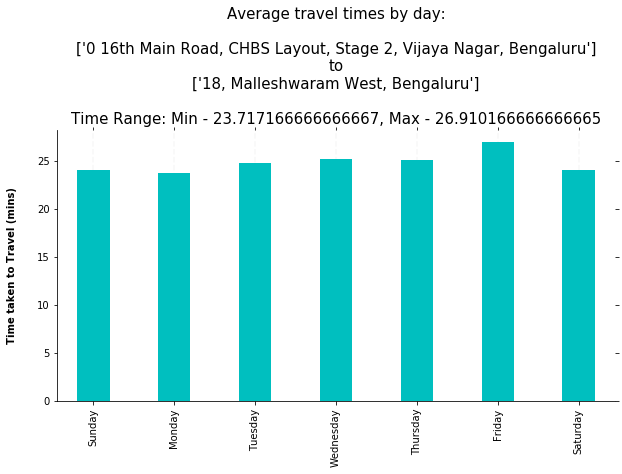

In [115]:
y = newdf1.groupby('dow_category')['mean_travel_time_mins'].mean()
ay = y.plot(kind='bar', figsize=(10, 5), zorder=2, width=0.4, color='c')
ay.spines['right'].set_visible(False)
ay.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ay.set_title('Average travel times by day:\n\n{}\nto\n{}\n\nTime Range: Min - {}, Max - {}'.format(s,d,wmi,wma), size=15)
ay.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ay.get_xticks()
for tick in vals:
    ay.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ay.set_xlabel("", labelpad=10, size=12)
# Set y-axis label
ay.set_ylabel("Time taken to Travel (mins)", labelpad=20, weight='bold', size=10)
display(ay)

In [116]:
##################     Average travel time by hour   ########################################

In [117]:
hma = newdf['mean_travel_time_mins'].max()
hmi = newdf['mean_travel_time_mins'].min()
gma = newdf['geometric_mean_travel_time_mins'].max()
gmi = newdf['geometric_mean_travel_time_mins'].min()

newdf = newdf.drop(['mean_travel_time','standard_deviation_travel_time','geometric_mean_travel_time'], axis = 1)
newdf.describe()

,sourceid,dstid,hod,geometric_standard_deviation_travel_time,mean_travel_time_mins,standard_deviation_travel_time_mins,geometric_mean_travel_time_mins
count,24.0,24.0,24.000000,24.000000,24.000000,24.000000,24.000000
mean,114.0,47.0,11.500000,1.278333,22.522924,6.175215,21.825910
std,0.0,0.0,7.071068,0.051471,4.996484,0.777987,5.021097
min,114.0,47.0,0.000000,1.210000,15.472500,4.495833,14.952000
25%,114.0,47.0,5.750000,1.240000,16.834792,5.791625,16.059167
50%,114.0,47.0,11.500000,1.260000,24.193667,6.263500,23.609833
75%,114.0,47.0,17.250000,1.320000,26.082417,6.409167,25.454292
max,114.0,47.0,23.000000,1.370000,31.740167,7.922000,30.874833


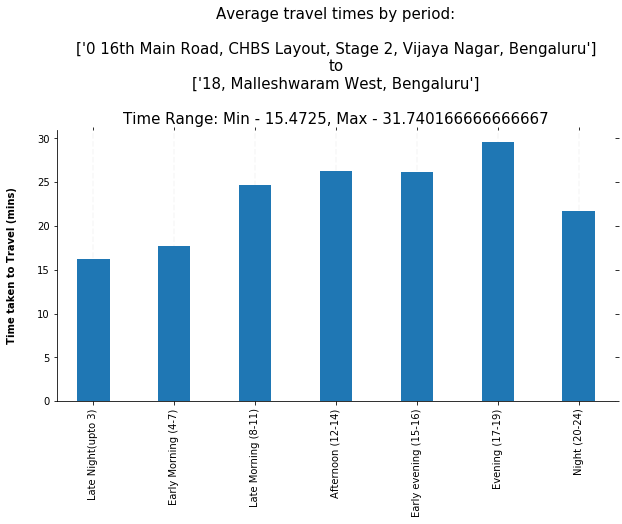

In [118]:
x = newdf.groupby('hod_category')['mean_travel_time_mins'].mean()
ax = x.plot(kind='bar', figsize=(10, 5), zorder=2, width=0.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Average travel times by period:\n\n{}\nto\n{}\n\nTime Range: Min - {}, Max - {}'.format(s,d,hmi,hma), size=15)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ax.set_xlabel("", labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("Time taken to Travel (mins)", labelpad=20, weight='bold', size=10)
display(ay)

In [119]:
##################     Geometric mean travel time by day   ########################################

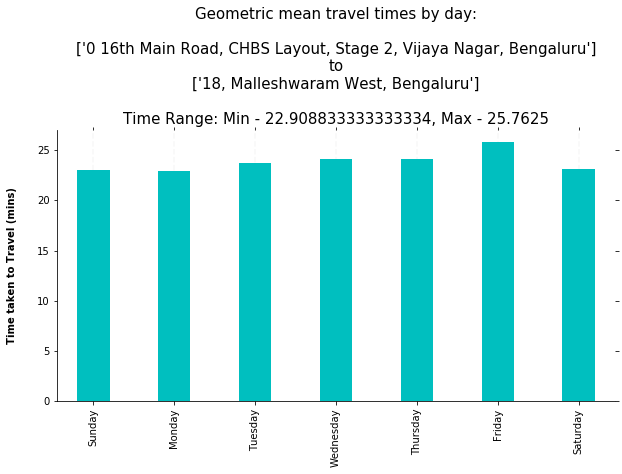

In [120]:
y = newdf1.groupby('dow_category')['geometric_mean_travel_time_mins'].mean()
ay = y.plot(kind='bar', figsize=(10, 5), zorder=2, width=0.4, color='c')
ay.spines['right'].set_visible(False)
ay.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ay.set_title('Geometric mean travel times by day:\n\n{}\nto\n{}\n\nTime Range: Min - {}, Max - {}'.format(s,d,wgmi,wgma), size=15)
ay.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ay.get_xticks()
for tick in vals:
    ay.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ay.set_xlabel("", labelpad=10, size=12)
# Set y-axis label
ay.set_ylabel("Time taken to Travel (mins)", labelpad=20, weight='bold', size=10)
display(ay)

In [121]:
##################     Average travel time by hour   ########################################

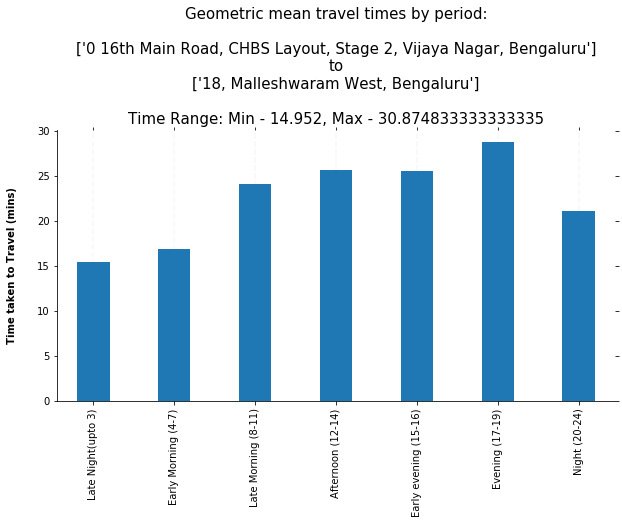

In [122]:
x = newdf.groupby('hod_category')['geometric_mean_travel_time_mins'].mean()
ax = x.plot(kind='bar', figsize=(10, 5), zorder=2, width=0.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Geometric mean travel times by period:\n\n{}\nto\n{}\n\nTime Range: Min - {}, Max - {}'.format(s,d,gmi,gma), size=15)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
# Set x-axis label
ax.set_xlabel("", labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("Time taken to Travel (mins)", labelpad=20, weight='bold', size=10)
display(ay)